In [1]:
import json
import string
import random 
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM

In [2]:
# Loading Json file
lemmatizer = WordNetLemmatizer()

with open("intent1.json") as file:
    data = json.load(file)

In [3]:
# Each list to create
words = []
classes = []
doc_X = []
doc_y = []
ignore_words = ['?', '!']

# Loop through all the intents
# tokenize each pattern and append tokens to words, the patterns and
# the associated tag to their associated list
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_X.append(pattern)
        doc_y.append(intent["tag"])
    
    # add the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])
    
# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

In [4]:
# Save Words (List of Vocabulary)
with open('vocabulary.json', 'w') as fp:
    json.dump(words, fp)

# Save Classes (List of label)
with open('labels.json', 'w') as fp:
    json.dump(classes, fp)


In [5]:
# list for training data
training = []
out_empty = [0] * len(classes)

# creating the bag of words model
for idx, doc in enumerate(doc_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
    
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)

# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

In [6]:
from keras.utils.vis_utils import plot_model
# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])
epochs = 200

#the deep learning model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation = "softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               35072     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1300      
Total params: 44,628
Trainable params: 44,628
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history = model.fit(x=train_X, y=train_y, epochs=epochs, verbose=1)

Epoch 1/200
28/28 [==============================] - 0s 1ms/step - loss: 2.7128 - accuracy: 0.1936
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 1.7062 - accuracy: 0.4851
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.9632 - accuracy: 0.7116
Epoch 4/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.8145
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8839
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9243
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9304
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9403
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9281
Epoch 10/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.9459
Epoch 11/

Epoch 83/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9730
Epoch 84/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9772
Epoch 85/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9712
Epoch 86/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9728
Epoch 87/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9831
Epoch 88/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9758
Epoch 89/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9723
Epoch 90/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.9722
Epoch 91/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9597
Epoch 92/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9629


28/28 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9752
Epoch 164/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9721
Epoch 165/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.9761
Epoch 166/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9858
Epoch 167/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9787
Epoch 168/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9821
Epoch 169/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9779
Epoch 170/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9787
Epoch 171/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9768
Epoch 172/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9842
Epoc

In [8]:
import pathlib
import pickle

# Export the SavedModel
export_dir = "tmp/saved_model"
tf.saved_model.save(model, export_dir)

# Convert the Model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path("tmp\converted_model.tflite")
tflite_model_file.write_bytes(tflite_model)

# Save Model H5
model.save("tmp/Capstone_Chatbot_Model.h5")

INFO:tensorflow:Assets written to: tmp/saved_model\assets


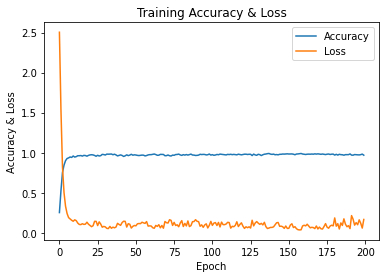

In [9]:
# summarize history for accuracy
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Training Accuracy & Loss')
plt.ylabel('Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.savefig('Model Accuracy.png')
#plt.savefig('Model Accuracy.pdf')
plt.show()

In [10]:
score, acc = model.evaluate(train_X, train_y)
print(f'Test score: {score:.4f}' )
print(f'Test accuracy: {acc*100:.2f}%')

28/28 [==============================] - 0s 703us/step - loss: 0.0097 - accuracy: 0.9944
Test score: 0.0097
Test accuracy: 99.44%
